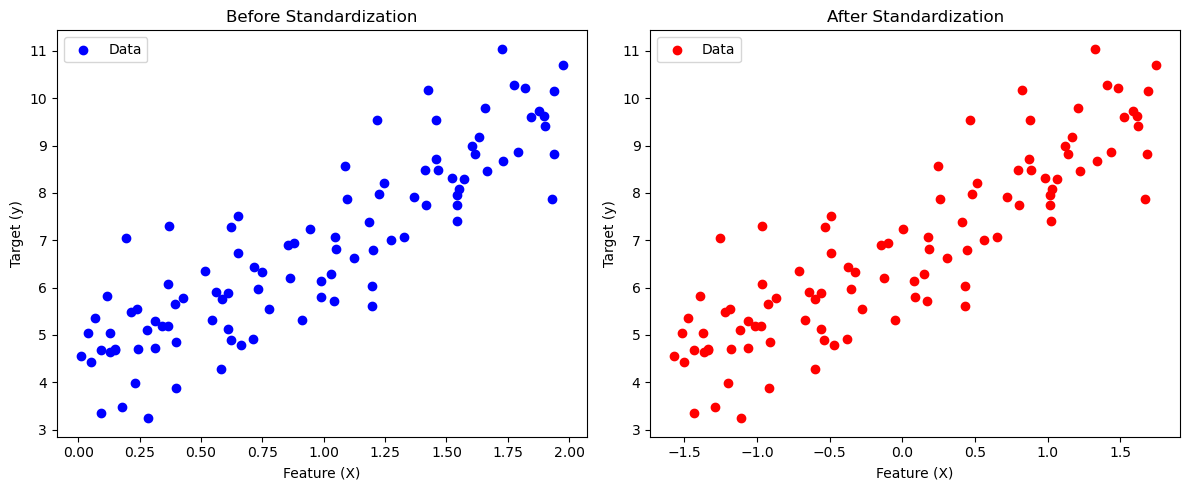

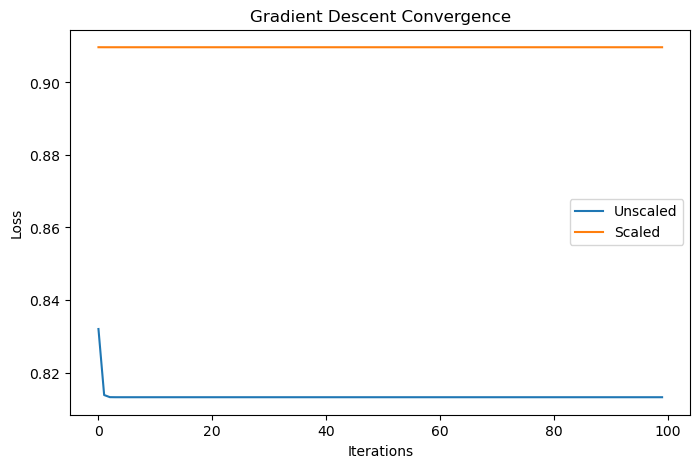

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor

# 生成示例数据
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # 特征，范围在 [0, 2]
y = 4 + 3 * X + np.random.randn(100, 1)  # 目标值，带有噪声

# 标准化前的数据
X_unscaled = X

# 标准化后的数据
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 可视化标准化前后的数据分布
plt.figure(figsize=(12, 5))

# 标准化前的数据分布
plt.subplot(1, 2, 1)
plt.scatter(X_unscaled, y, color='blue', label='Data')
plt.title('Before Standardization')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.legend()

# 标准化后的数据分布
plt.subplot(1, 2, 2)
plt.scatter(X_scaled, y, color='red', label='Data')
plt.title('After Standardization')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.legend()

plt.tight_layout()
plt.show()

# 使用梯度下降拟合模型并比较收敛速度
def fit_and_plot(X, title):
    model = SGDRegressor(learning_rate='constant', eta0=0.1, max_iter=100, random_state=42)
    losses = []
    for _ in range(100):
        model.partial_fit(X, y.ravel())
        losses.append(np.mean((model.predict(X) - y.ravel()) ** 2))
    
    plt.plot(losses, label=title)

plt.figure(figsize=(8, 5))
fit_and_plot(X_unscaled, 'Unscaled')
fit_and_plot(X_scaled, 'Scaled')
plt.title('Gradient Descent Convergence')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()